In [7]:
#Load the dataset
import pandas as pd 
dataset = pd.read_excel(r'F:/PGDM-RBA/Summer Internship/Seller Center_SentimentAnalysis_Unsupervised.xlsx')

dataset.head()

,Partner ID,Response
0,629694,the portal is very slow
1,635501,"""System runs very slow, not always accurate"""
2,10000000172,The website does not function well and freezes...
3,10000000195,"""The delivery metrics are very delayed,"
4,10000000195,you can not delete SKU's


In [8]:
def gen_freq(Response):
    #Will store the list of words
    word_list = []
    
    #Loop over all the responses and extract words into word_list
    for tw_words in Response.split():
        word_list.extend(tw_words)
        
    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()
    

    #Print top 20 words
    word_freq[:20]
    
    return word_freq

gen_freq(dataset.Response.str)

to           2023
and          1110
the          1087
is            959
a             765
             ... 
question,       1
hr              1
opinion         1
warrant         1
invokes.        1
Length: 5868, dtype: int64

In [9]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


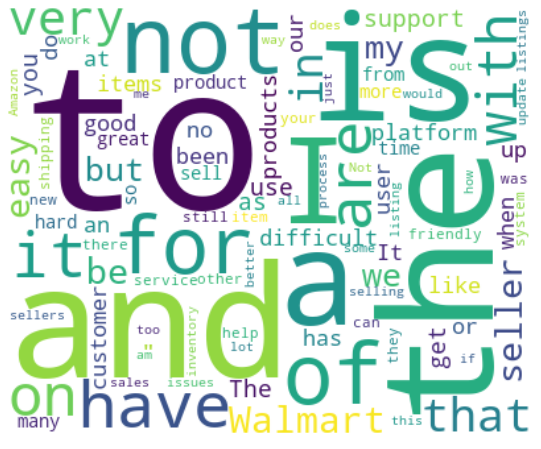

In [10]:
#Import libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS

word_freq = gen_freq(dataset.Response.str)*100


#Generate word cloud
wc = WordCloud(width=400, height=330, max_words=100, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
#Import list of stopwards
from wordcloud import STOPWORDS

print(STOPWORDS)

{"couldn't", 'has', 'so', 'only', "here's", 'then', 'further', 'on', "he'd", 'k', "that's", 'been', 'by', 'theirs', 'few', 'he', "we'll", "where's", 'his', 'down', "can't", 'else', "we'd", "didn't", 'do', 'after', 'am', 'does', 'be', 'as', 'she', 'since', 'also', 'most', "hadn't", 'my', 'about', 'which', "doesn't", 'that', 'no', 'yourselves', "weren't", "who's", 'out', "isn't", 'them', 'http', 'can', "you'd", 'here', 'nor', 'again', 'through', 'whom', "wasn't", 'get', 'into', 'ourselves', "let's", 'these', 'to', 'r', 'did', "there's", 'this', 'www', "how's", 'itself', 'if', "you've", 'a', 'above', 'your', "she'd", 'who', "mustn't", 'why', 'have', 'cannot', 'too', 'themselves', "they'll", 'her', 'yours', 'with', 'but', "haven't", 'doing', "he'll", "i'm", 'over', 'in', 'own', 'and', 'ever', 'yourself', 'how', "when's", "we've", "she'll", "shan't", 'having', 'just', 'shall', 'what', 'when', 'him', 'our', "i'd", "don't", 'myself', "you're", 'an', 'ours', 'its', 'under', 'than', "won't", "w

In [14]:
import re

def clean_text(Response):
    #Remove punctuations
    Response = re.sub(r'[?!".;:,#@-]', '', Response)
    
    #Convert to lowercase to maintain consistency
    Response = Response.lower()
    return Response

In [13]:
def gen_freq(Response):
    #Will store the list of words
    word_list = []
    
    #Loop over all the responses and extract words into word_list
    for tw_words in Response.split():
        word_list.extend(tw_words)
        
    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()
    word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')
    

    #Print top 20 words
    word_freq[:20]
    
    return word_freq

gen_freq(dataset.Response.str)

I            623
Walmart      260
easy         242
seller       238
support      194
            ... 
question,      1
hr             1
opinion        1
warrant        1
invokes.       1
Length: 5722, dtype: int64

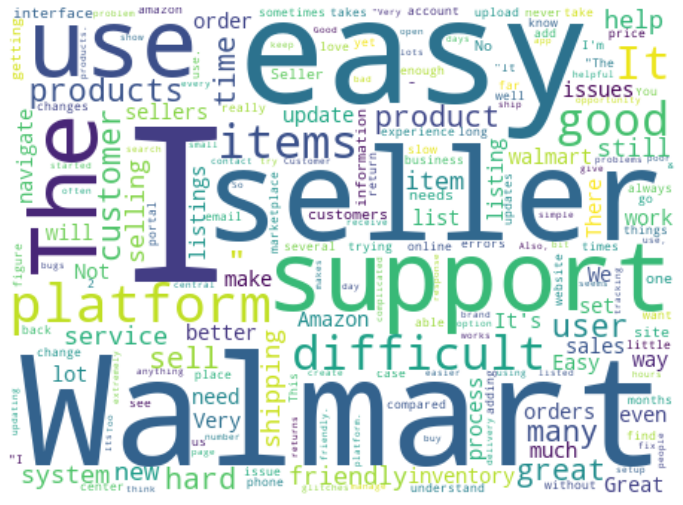

In [15]:
Response = dataset.Response.apply(lambda x: clean_text(x))
word_freq = gen_freq(dataset.Response.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

#Generate word cloud
wc = WordCloud(width=450, height=330, max_words=200, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

In [17]:
#Sentiment Analysis
SIA = SentimentIntensityAnalyzer()
dataset["Response"]= dataset["Response"].astype(str)

In [18]:
# Applying Model, Variable Creation
dataset['Polarity Score']=dataset["Response"].apply(lambda x:SIA.polarity_scores(x)['compound'])
dataset['Neutral Score']=dataset["Response"].apply(lambda x:SIA.polarity_scores(x)['neu'])
dataset['Negative Score']=dataset["Response"].apply(lambda x:SIA.polarity_scores(x)['neg'])
dataset['Positive Score']=dataset["Response"].apply(lambda x:SIA.polarity_scores(x)['pos'])

In [19]:
# Converting 0 to 1 Decimal Score to a Categorical Variable
dataset['Sentiment']=''
dataset.loc[dataset['Polarity Score']>0,'Sentiment']='Positive'
dataset.loc[dataset['Polarity Score']==0,'Sentiment']='Neutral'
dataset.loc[dataset['Polarity Score']<0,'Sentiment']='Negative'
dataset[:10]

,Partner ID,Response,Polarity Score,Neutral Score,Negative Score,Positive Score,Sentiment
0,629694,the portal is very slow,0.0000,1.000,0.000,0.00,Neutral
1,635501,"""System runs very slow, not always accurate""",0.0000,1.000,0.000,0.00,Neutral
2,10000000172,The website does not function well and freezes...,-0.2297,0.706,0.294,0.00,Negative
3,10000000195,"""The delivery metrics are very delayed,",-0.2944,0.695,0.305,0.00,Negative
4,10000000195,you can not delete SKU's,0.0000,1.000,0.000,0.00,Neutral
5,10000000195,and the refund process and information is hard...,-0.1027,0.887,0.113,0.00,Negative
6,10000000243,Some features are not available,0.0000,1.000,0.000,0.00,Neutral
7,10000000280,good website to shop from\n,0.4404,0.580,0.000,0.42,Positive
8,10000000316,"""too hard to navigate at product level.",-0.1027,0.811,0.189,0.00,Negative
9,10000000316,have to switch from sellerfulfilled to WFS and...,0.0000,1.000,0.000,0.00,Neutral


In [20]:
dataset.to_excel("Unsupervised_Sentiment_analysis.xlsx")

Percentage for Sentiment

Positive    45.869
Negative    29.069
Neutral     25.062
Name: Sentiment, dtype: float64


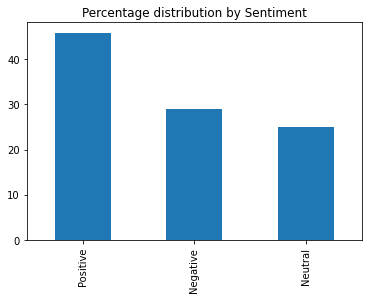

In [21]:
#Checking for the distribution of Sentiments
import matplotlib.pyplot as plt
%matplotlib inline
print("Percentage for Sentiment\n")
print(round(dataset.Sentiment.value_counts(normalize=True)*100,3))
round(dataset.Sentiment.value_counts(normalize=True)*100,3).plot(kind='bar')
plt.title('Percentage distribution by Sentiment')
plt.show()